# Sortino: Daily data; Age > 90 and Age > 180

In [10]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2024      426059     -0.6557      0.0000      0.0597     0.09524      0.1374     33.4545      0.3504 


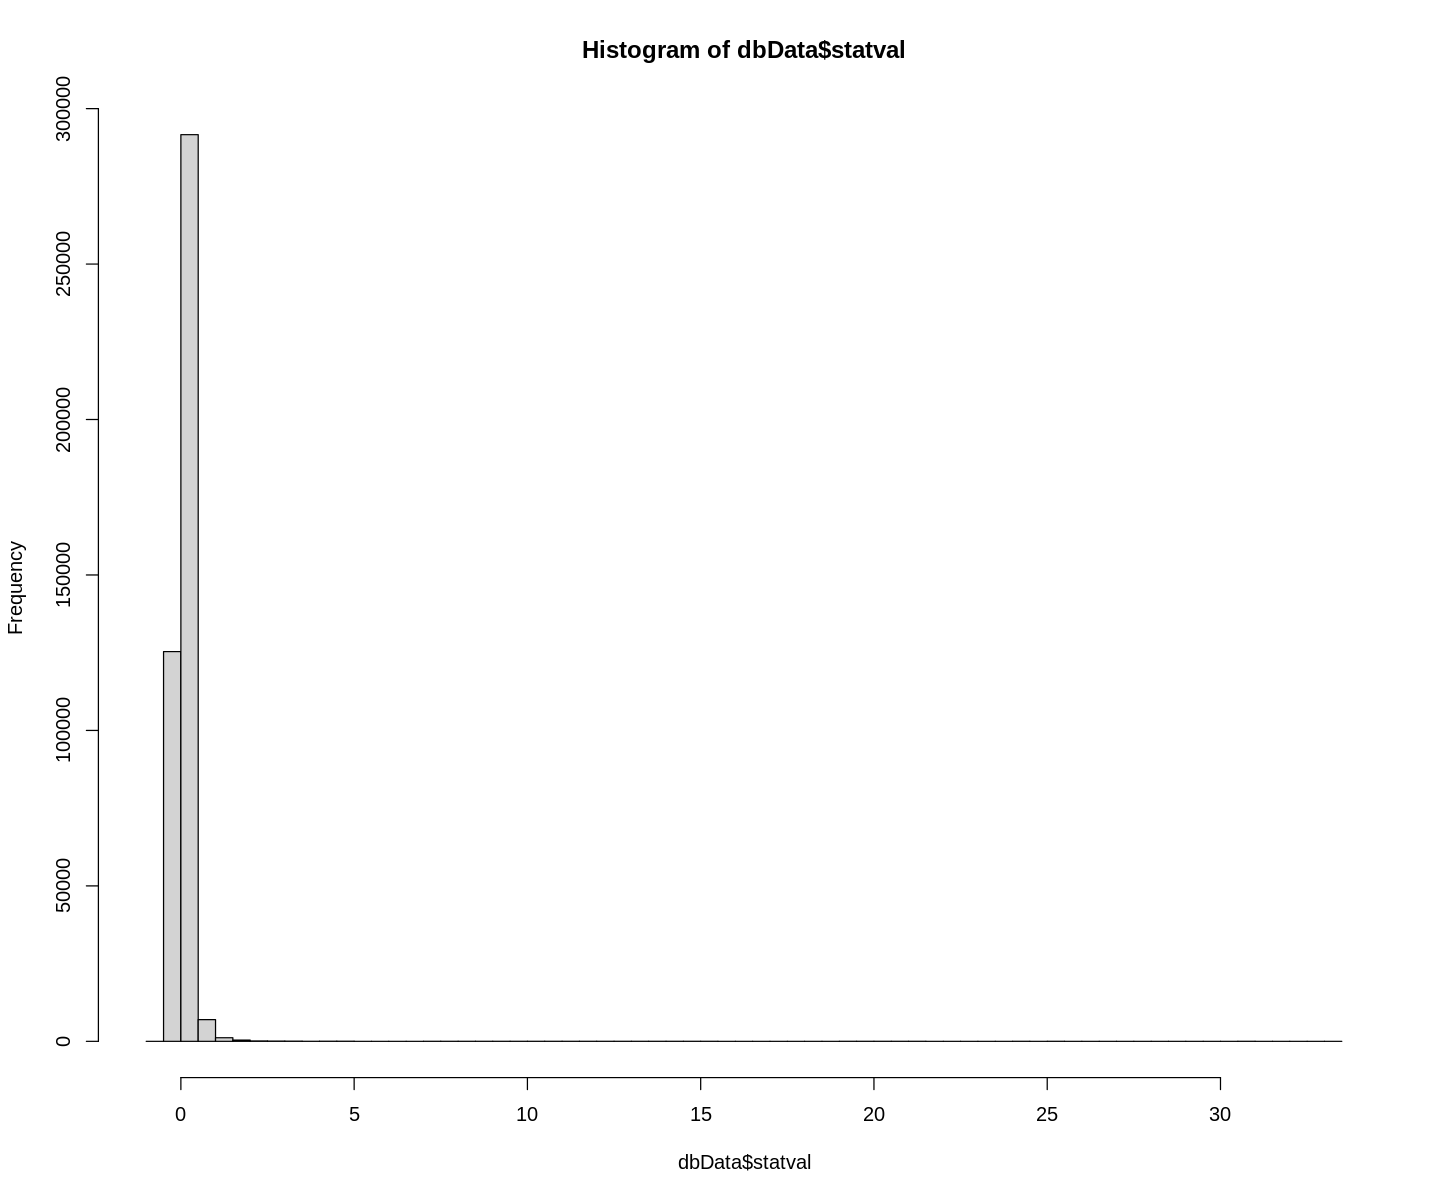

In [11]:
# Stats overview
sql = "select Sortino as statval, s.systemid  
       from c2score_sortino s
       join c2systems sys on s.systemid=sys.guid 
       where (DATEDIFF(s.date, Date(from_unixtime(added))) + 1) > 90"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1675      335185      0.0000     0.03519     0.08716      0.1284      0.1649      3.9736      0.1677 


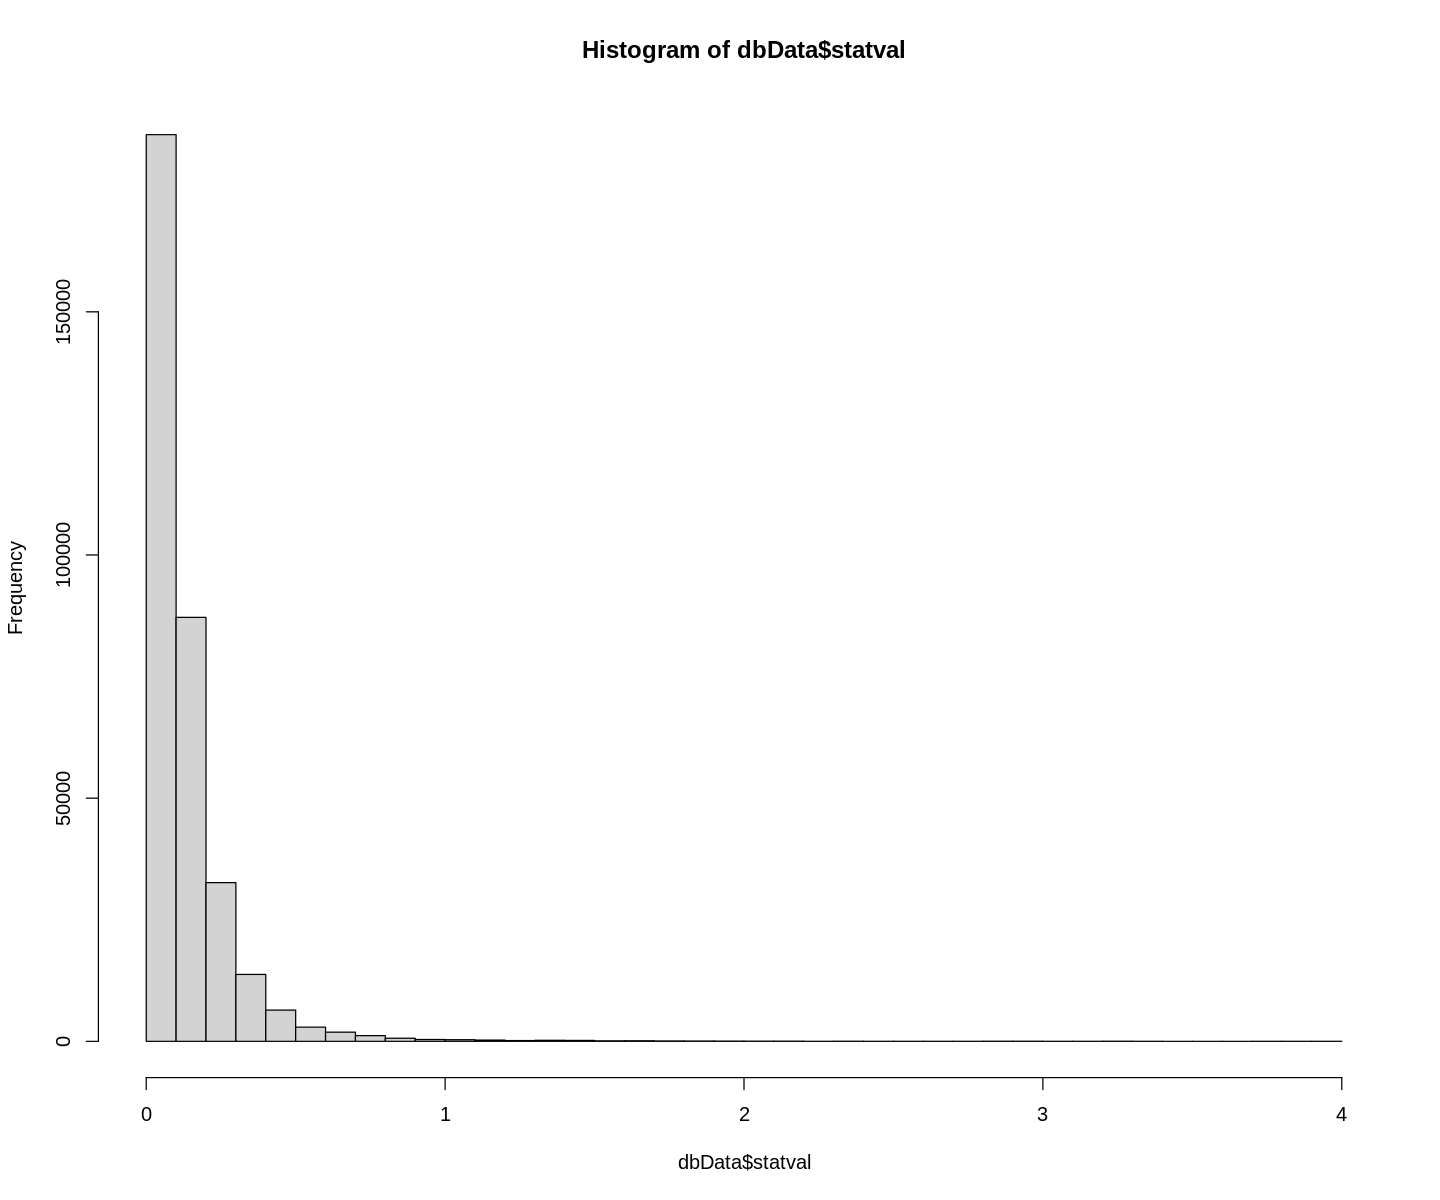

In [12]:
#Let's get Sortino >= 0 and Sortino <= 4

sql = "select Sortino as statval, s.systemid  
       from c2score_sortino s
       join c2systems sys on s.systemid=sys.guid 
       where (DATEDIFF(s.date, Date(from_unixtime(added))) + 1) > 90
             and Sortino >= 0 and Sortino <= 4"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1625      333357      0.0000      0.0357     0.08742      0.1283      0.1650      3.9736      0.1650 


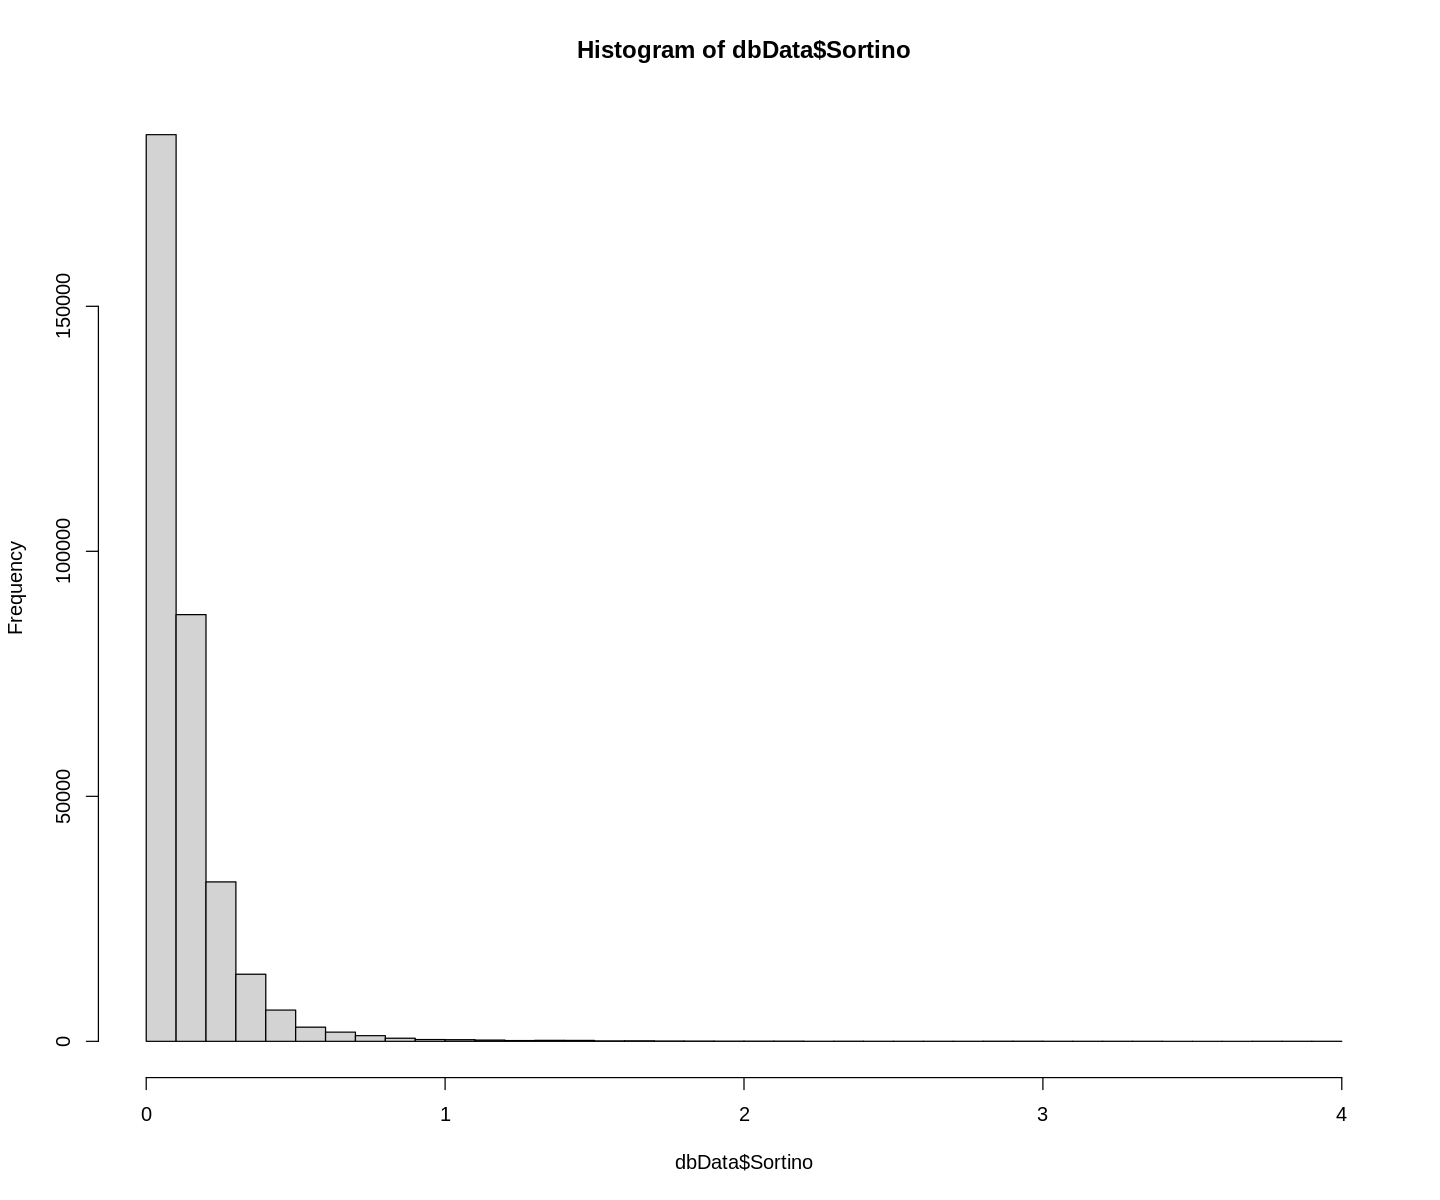

In [13]:
# Join it with our cleaned data
sql = "select Sortino, r.* 
       from ReturnsDataInIntervalsCleanedSkip090 r 
       join c2score_sortino stat on stat.systemid=r.systemid and stat.Date = r.DateStart
       where Sortino >= 0 and Sortino <= 4 and Age > 90"
dbData = getC2ScoreDbData(sql)
overview(dbData,"Sortino")
hist(dbData$Sortino,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1625      333357      0.0000      0.0357     0.08742      0.1283      0.1650      3.9736      0.1650 



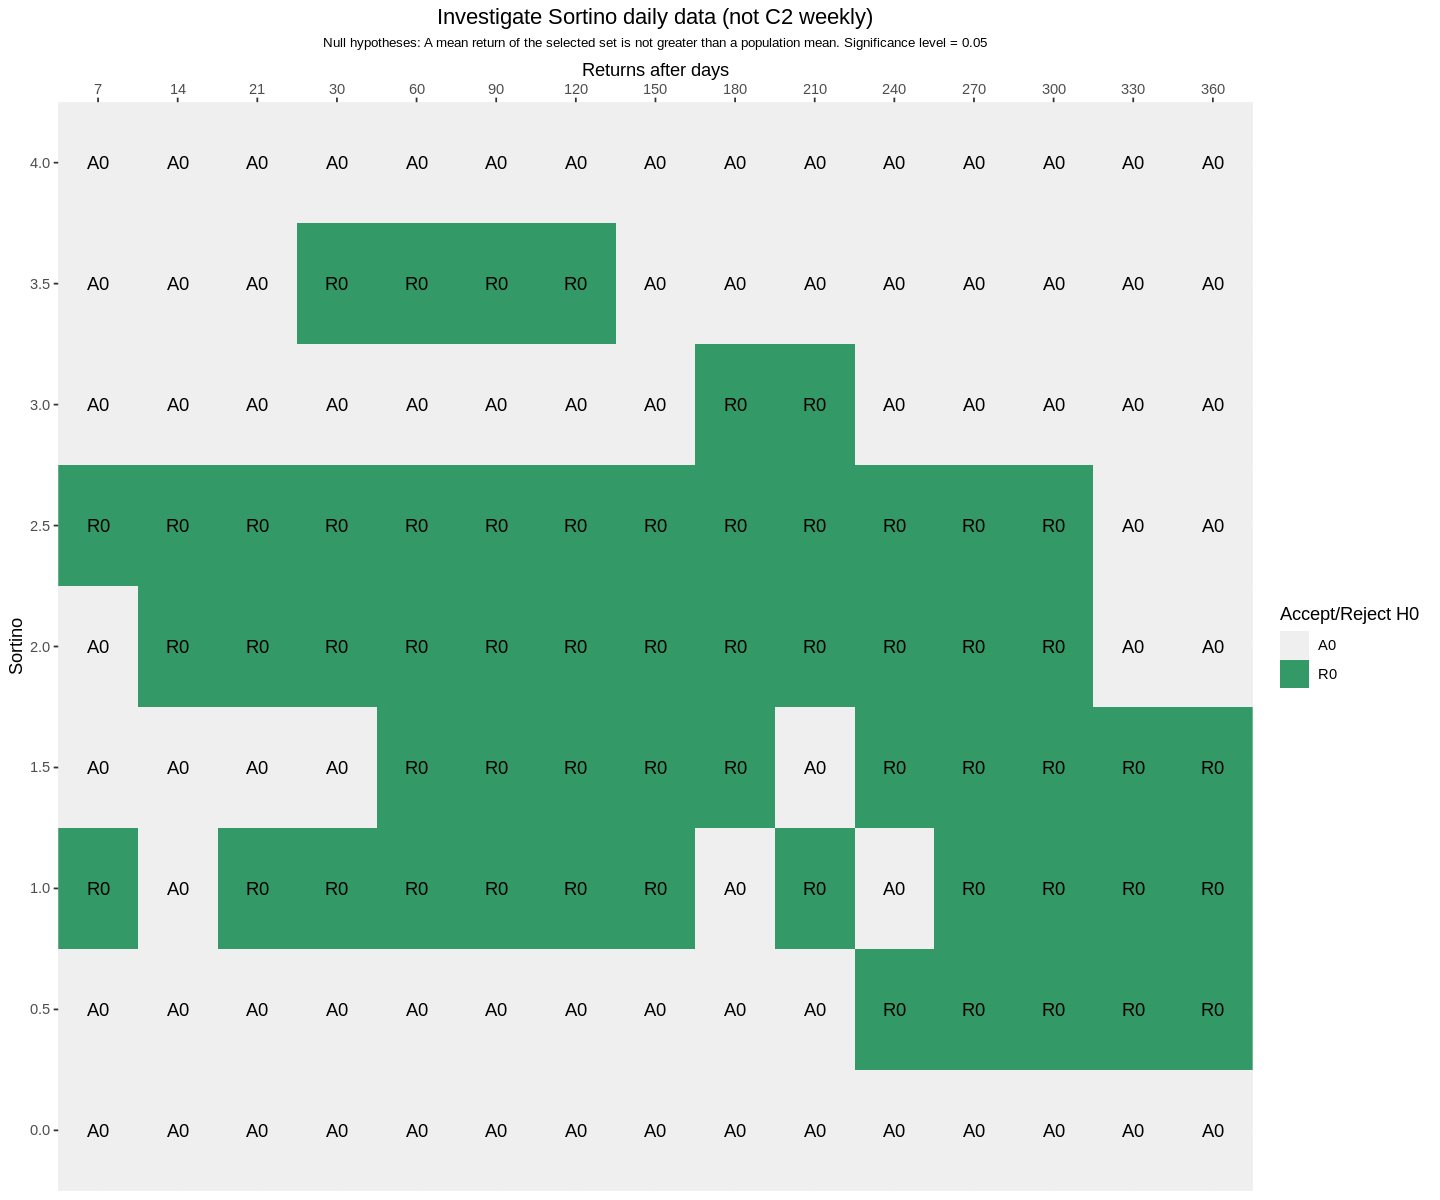

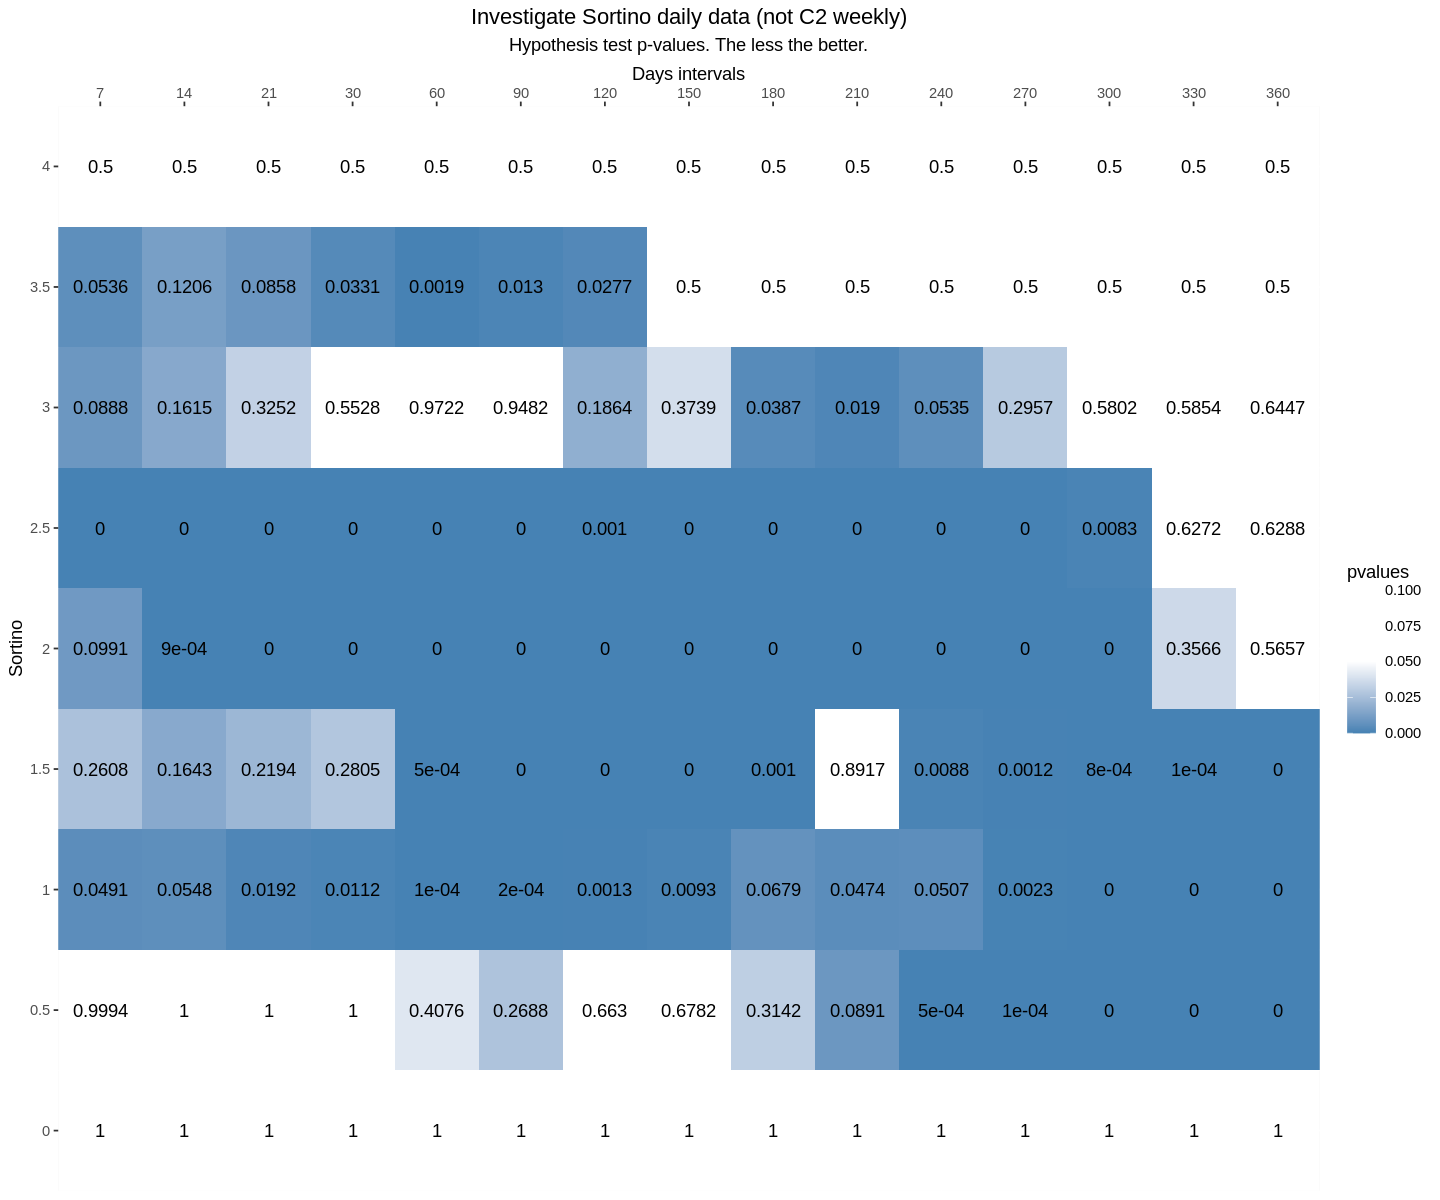

In [14]:
experiment = list(
  name = "Daily. 0 <= Sortino <= 4 and Age > 90",
  description = "Investigate Sortino daily data (not C2 weekly)",
  sqlText = sql, # the last sql above
  attributeName = "Sortino",
  attributeSteps = seq(from = 0.0, to = 4, by = 0.5),
  comparisonOperator = `>`)

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


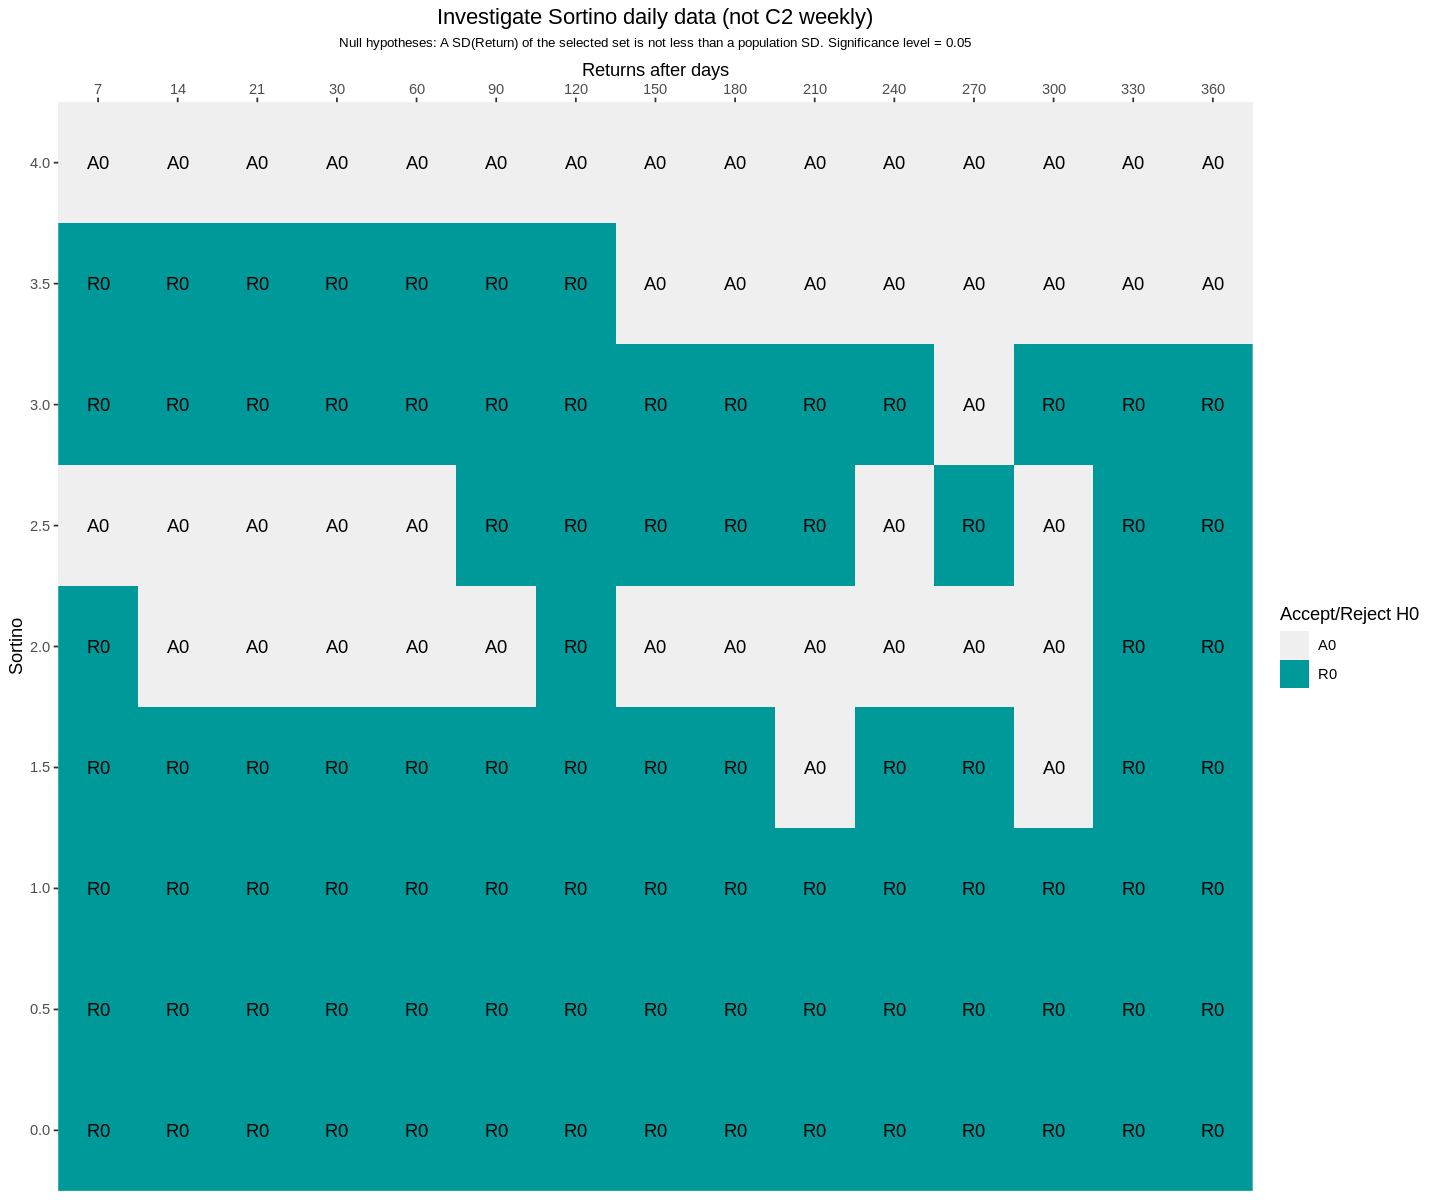

In [15]:
showSDLessHypothesisTest(experiment, result)

In [16]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.5 <= Sortino < 4,8,8,8,8,8,8,6,0,0,0,0,0,0,0,0
3 <= Sortino < 3.5,36,36,36,36,36,34,32,32,32,32,32,5,1,1,1
2.5 <= Sortino < 3,67,67,67,66,65,65,44,44,44,44,20,17,5,2,2
2 <= Sortino < 2.5,107,107,107,101,94,76,76,76,65,62,51,36,22,10,10
1.5 <= Sortino < 2,351,344,336,325,282,222,192,159,135,105,71,71,53,51,46
1 <= Sortino < 1.5,1117,1096,1075,1054,926,834,790,725,612,505,474,441,391,340,336
0.5 <= Sortino < 1,6870,6770,6657,6469,5832,5340,4897,4575,4247,3790,3248,2755,2438,2181,1927
0 <= Sortino < 0.5,316244,307992,299969,289925,259250,232475,209189,188485,170024,153782,138981,125730,114249,104061,94988



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



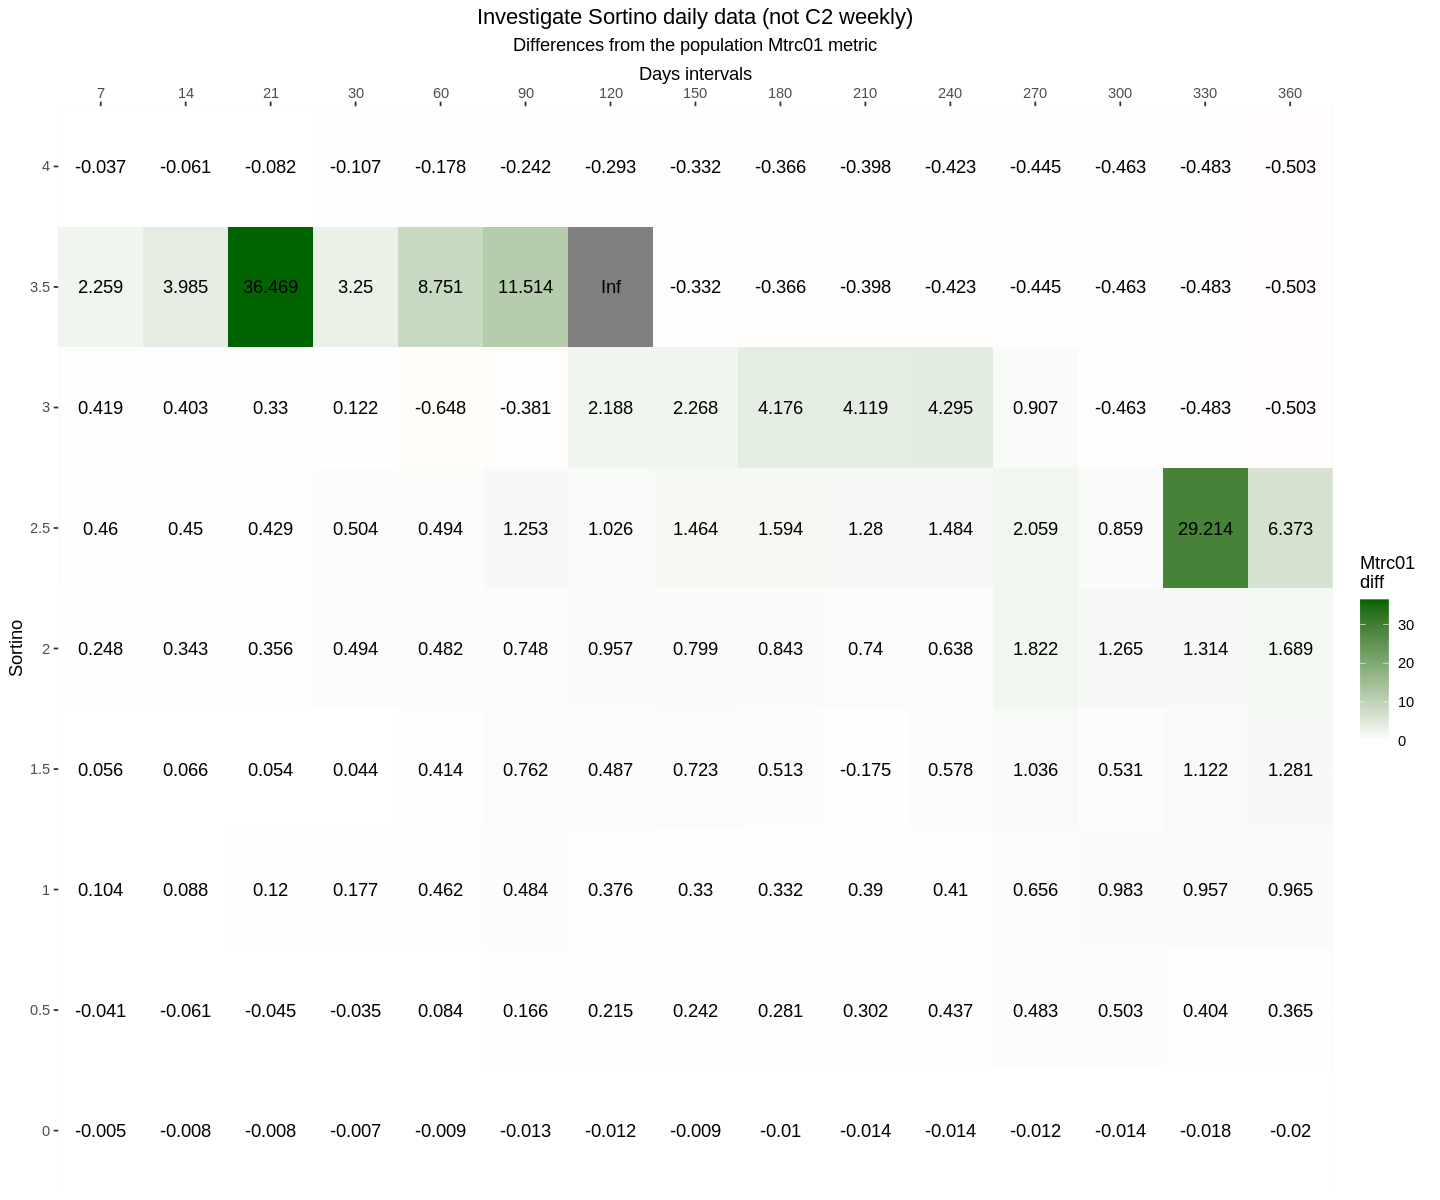

In [17]:
showMetricDifferences(experiment, result)

In [18]:
showSystemsCounts(experiment, result) 



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.5 <= Sortino < 4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
3 <= Sortino < 3.5,3,3,3,3,3,3,2,2,2,2,2,2,1,1,1
2.5 <= Sortino < 3,6,6,6,5,4,4,3,3,3,3,2,2,2,1,1
2 <= Sortino < 2.5,9,9,9,8,7,5,5,5,5,4,4,3,3,2,2
1.5 <= Sortino < 2,21,21,20,19,17,15,15,14,13,11,8,8,7,6,5
1 <= Sortino < 1.5,41,41,41,39,35,30,28,27,25,23,19,17,14,12,11
0.5 <= Sortino < 1,191,188,185,182,155,128,114,104,95,91,82,68,59,55,48
0 <= Sortino < 0.5,1535,1458,1409,1342,1134,982,847,743,652,588,534,463,416,376,343


### Discussion 

............

## Age > 180

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         959      250933      0.0000     0.03079     0.07802      0.1062      0.1392      3.9736      0.1306 


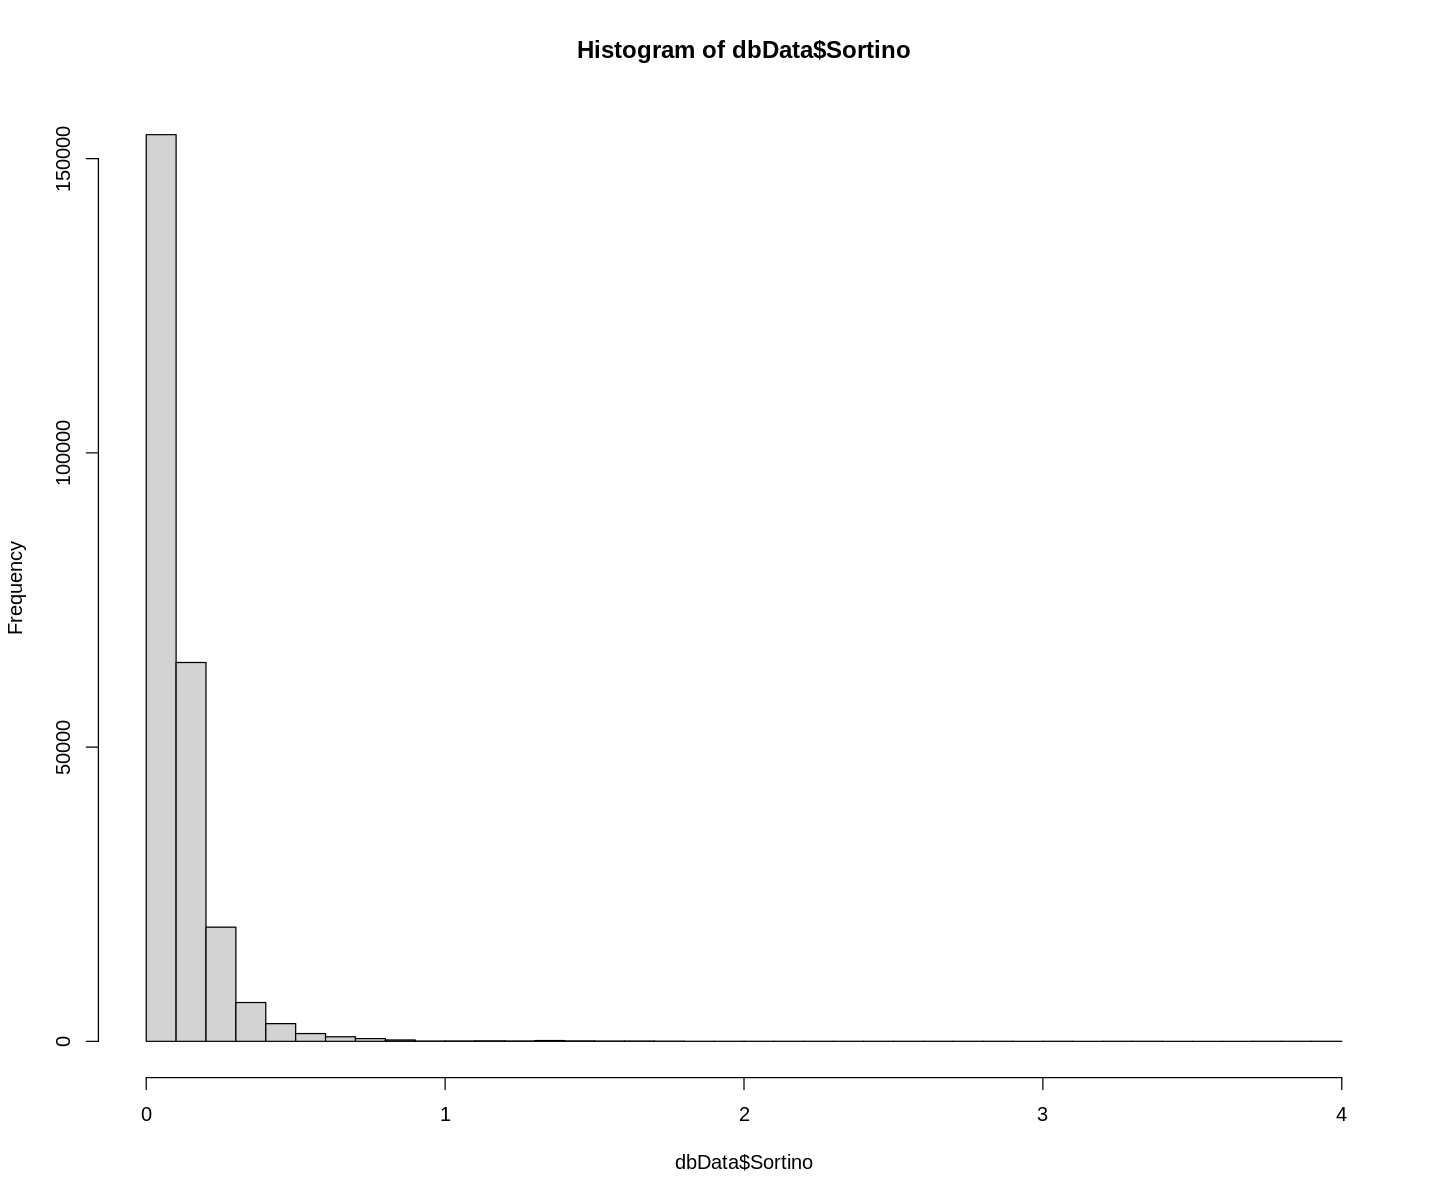

In [19]:
# Join it with our cleaned data and use Age > 180
sql = "select Sortino, r.* 
       from ReturnsDataInIntervalsCleanedSkip090 r 
       join c2score_sortino stat on stat.systemid=r.systemid and stat.Date = r.DateStart
       where Sortino >= 0 and Sortino <= 4 and Age > 180"
dbData = getC2ScoreDbData(sql)
overview(dbData,"Sortino")
hist(dbData$Sortino,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         959      250933      0.0000     0.03079     0.07802      0.1062      0.1392      3.9736      0.1306 



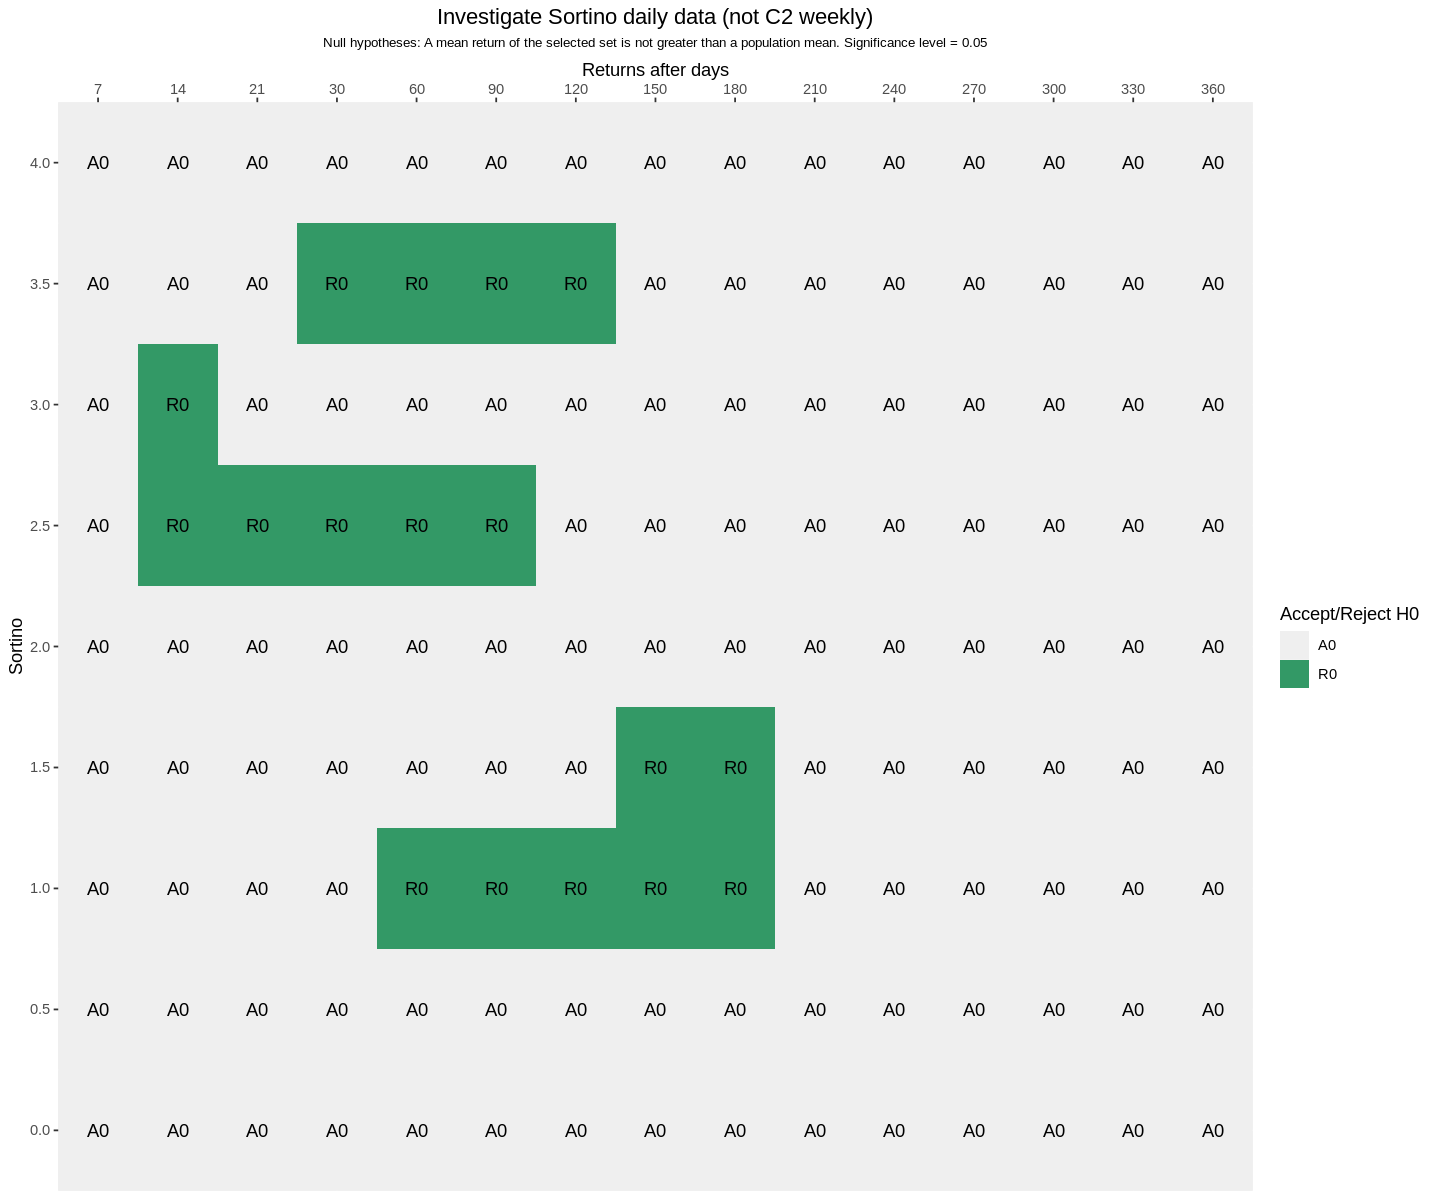

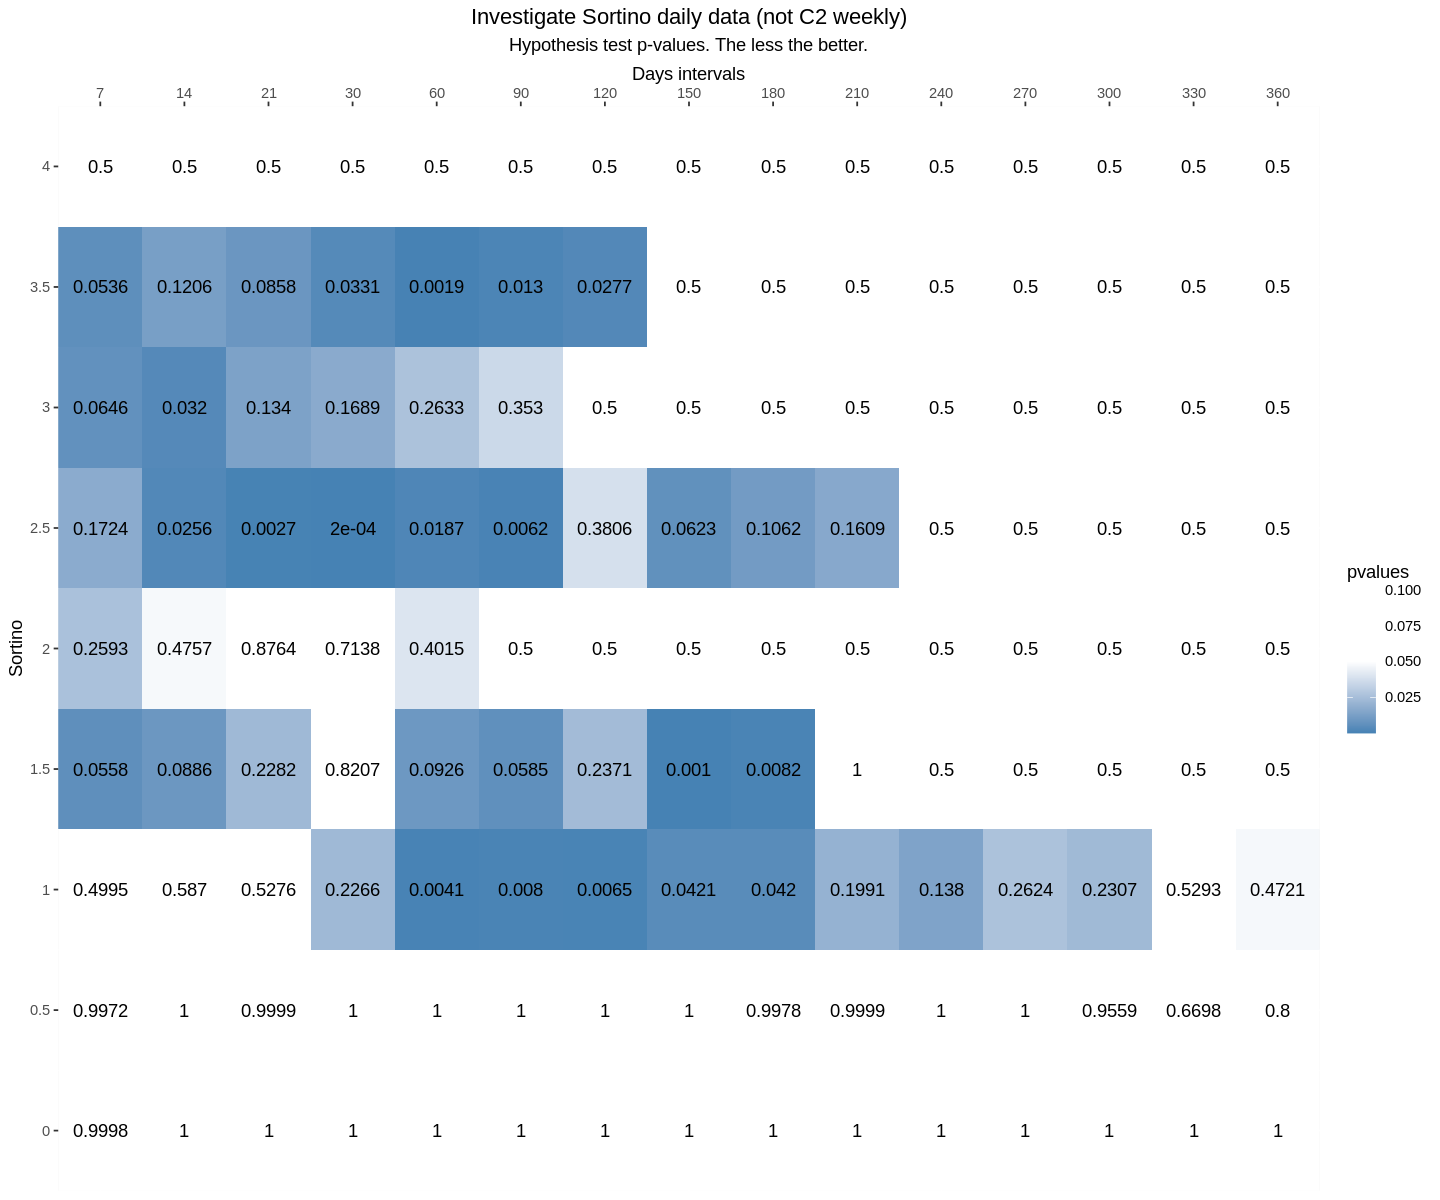

In [20]:
experiment = list(
  name = "Daily. 0 <= Sortino <= 4 and Age > 180",
  description = "Investigate Sortino daily data (not C2 weekly)",
  sqlText = sql,
  attributeName = "Sortino",
  attributeSteps = seq(from = 0.0, to = 4, by = 0.5),    
  comparisonOperator = `>`)

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


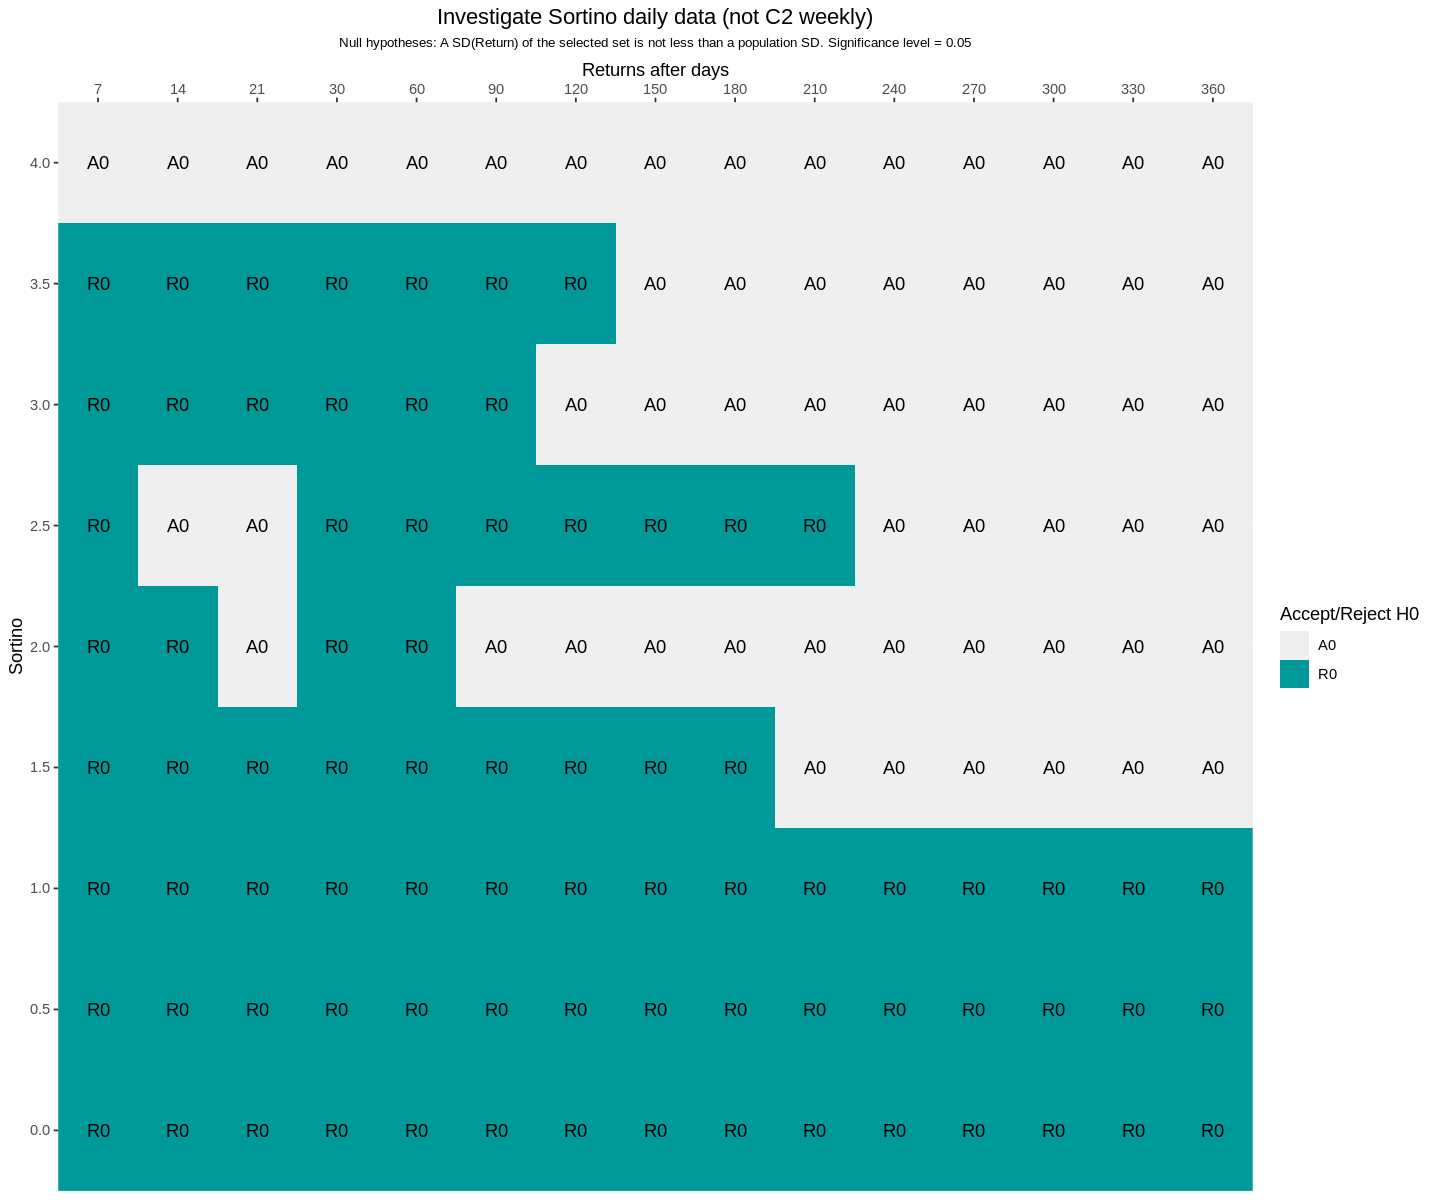

In [21]:
showSDLessHypothesisTest(experiment, result)

In [22]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.5 <= Sortino < 4,8,8,8,8,8,8,6,0,0,0,0,0,0,0,0
3 <= Sortino < 3.5,4,4,4,4,4,2,0,0,0,0,0,0,0,0,0
2.5 <= Sortino < 3,30,30,30,29,29,29,8,8,8,8,0,0,0,0,0
2 <= Sortino < 2.5,21,21,21,20,18,0,0,0,0,0,0,0,0,0,0
1.5 <= Sortino < 2,150,143,136,127,85,25,22,22,22,15,0,0,0,0,0
1 <= Sortino < 1.5,411,404,397,387,312,254,224,186,141,99,94,94,94,94,94
0.5 <= Sortino < 1,2806,2753,2696,2608,2404,2225,2048,1864,1656,1436,1261,1142,1059,944,809
0 <= Sortino < 0.5,242159,236948,231829,225376,204794,185354,168131,152435,138256,125911,114854,104933,95959,87816,80290



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



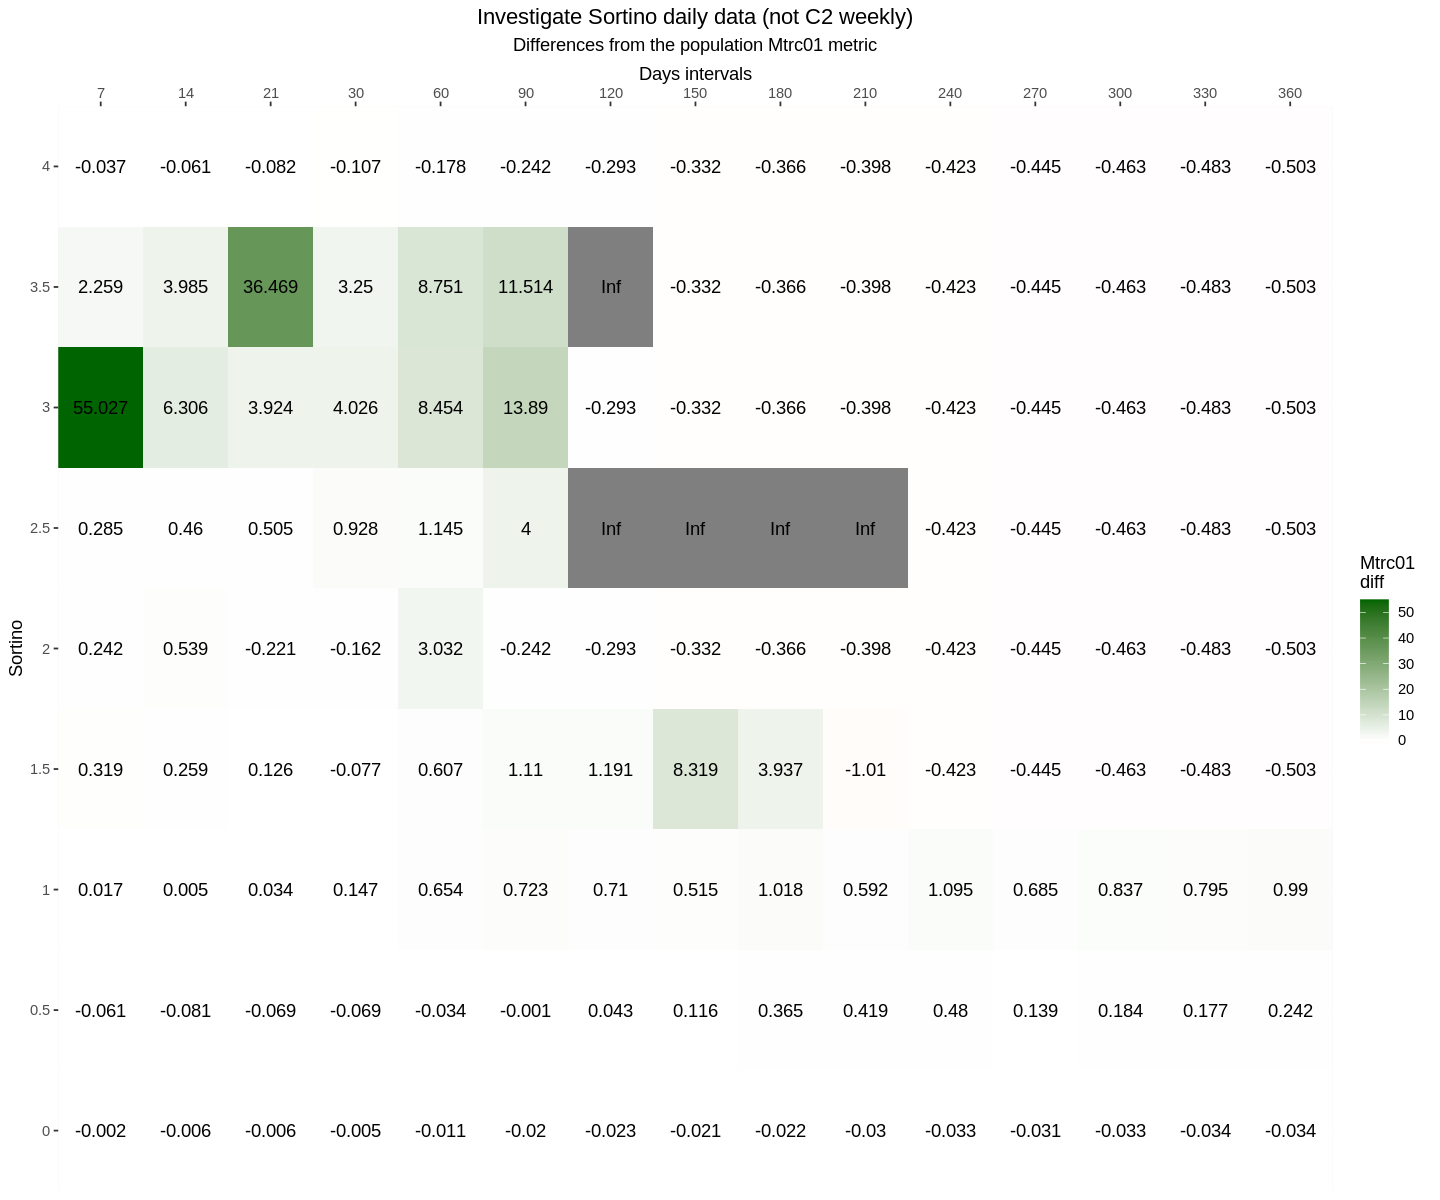

In [23]:
showMetricDifferences(experiment, result)

In [24]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.5 <= Sortino < 4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
3 <= Sortino < 3.5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
2.5 <= Sortino < 3,3,3,3,2,2,2,1,1,1,1,0,0,0,0,0
2 <= Sortino < 2.5,3,3,3,2,2,0,0,0,0,0,0,0,0,0,0
1.5 <= Sortino < 2,6,6,6,6,5,3,2,2,2,2,0,0,0,0,0
1 <= Sortino < 1.5,14,14,14,13,11,8,8,8,7,6,5,5,5,5,5
0.5 <= Sortino < 1,66,65,63,62,55,50,48,44,41,35,29,25,24,24,23
0 <= Sortino < 0.5,926,903,875,856,777,714,624,573,493,444,389,355,326,303,276


### Discussion 

...................